# Predict number of upvotes

## Problem Statement

An online question and answer platform has hired you as a data scientist to identify the best question authors on the platform. This identification will bring more insight into increasing the user engagement. Given the tag of the question, number of views received, number of answers, username and reputation of the question author, the problem requires you to predict the upvote count that the question will receive.

## Data Dictionary

#### ID-	Question ID,
#### Tag-	Anonymised tags representing question category,
#### Reputation-	Reputation score of question author,
#### Answers-	Number of times question has been answered,
#### Username-	Anonymised user id of question author,
#### Views-	Number of times question has been viewed,
### Upvotes	(Target)- Number of upvotes for the question

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train_NIR5Yl1.csv")

In [3]:
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [4]:
df.shape

(330045, 7)

In [5]:
df.Reputation.value_counts()

0.0         6632
1.0         1077
11.0        1032
16.0        1030
6.0          980
21.0         951
26.0         843
31.0         829
18.0         808
28.0         803
13.0         795
23.0         794
8.0          782
36.0         751
33.0         717
41.0         712
38.0         654
46.0         652
43.0         625
51.0         624
48.0         610
53.0         563
66.0         549
58.0         541
71.0         534
56.0         527
63.0         521
61.0         510
3.0          499
68.0         495
            ... 
61545.0        1
37813.0        1
17614.0        1
61562.0        1
13140.0        1
61572.0        1
8734.0         1
19861.0        1
492607.0       1
11162.0        1
11948.0        1
8835.0         1
15375.0        1
12212.0        1
17858.0        1
8530.0         1
8916.0         1
9456.0         1
17854.0        1
71415.0        1
105270.0       1
17847.0        1
21272.0        1
17851.0        1
61501.0        1
158927.0       1
17608.0        1
42819.0       

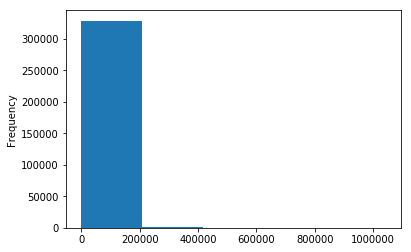

In [6]:
df.Reputation.plot.hist(bins=5)

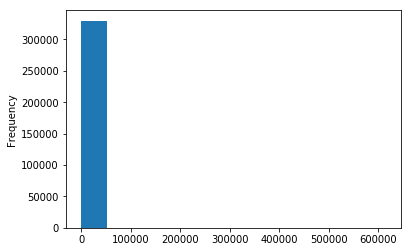

In [7]:
df.Upvotes.plot.hist(bins=12)

In [8]:
df["Upvotes"].value_counts().argsort()

3.0         7238
2.0         4939
1.0         4938
4.0         4937
5.0         4936
6.0         4935
7.0         4934
0.0         4933
8.0         4932
9.0         4931
10.0        4930
11.0        4929
12.0        4928
13.0        4927
14.0        4926
15.0        4925
16.0        4924
17.0        4923
18.0        4922
19.0        4921
20.0        4920
21.0        4919
22.0        4918
23.0        4917
24.0        4940
25.0        4916
26.0        4941
28.0        4943
27.0        4966
29.0        4965
            ... 
46106.0       29
3798.0        28
4787.0        27
7652.0        26
483995.0      25
4110.0        24
4222.0        23
9012.0        22
2644.0        21
5344.0        20
11507.0       19
4030.0        18
11732.0       17
5748.0        16
3799.0        15
22991.0       14
5118.0        13
5745.0        12
45958.0       11
11489.0       10
3783.0         9
5741.0         8
45924.0        7
23220.0        6
2869.0         5
6464.0         4
4429.0         3
11470.0       

In [9]:
len(df["Upvotes"].value_counts().unique())

339

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
ID            330045 non-null int64
Tag           330045 non-null object
Reputation    330045 non-null float64
Answers       330045 non-null float64
Username      330045 non-null int64
Views         330045 non-null float64
Upvotes       330045 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


In [11]:
df.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [12]:
df.Reputation.describe()//1

count     330045.0
mean        7773.0
std        27061.0
min            0.0
25%          282.0
50%         1236.0
75%         5118.0
max      1042428.0
Name: Reputation, dtype: float64

In [13]:
df.Views.describe()//1

count     330045.0
mean       29645.0
std        80956.0
min            9.0
25%         2594.0
50%         8954.0
75%        26870.0
max      5231058.0
Name: Views, dtype: float64

In [14]:
df_1=df.drop(columns=["ID"])

In [15]:
cols = list(df_1)
cols

['Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes']

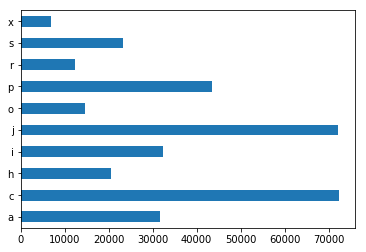

In [16]:
df_1.Tag.value_counts().sort_index().plot.barh()

In [17]:
%matplotlib inline

#### BinaryEncoding

In [18]:
import category_encoders as ce

bin_enc = ce.BinaryEncoder(drop_invariant=1)

In [19]:
bin_enc.fit(df_1[["Tag"]])

BinaryEncoder(cols=['Tag'], drop_invariant=1, handle_unknown='impute',
       impute_missing=True, return_df=True, verbose=0)

In [20]:
bin_t =bin_enc.transform(df_1[["Tag"]])

In [21]:
bin_t

,Tag_1,Tag_2,Tag_3,Tag_4
0,0,0,0,1
1,0,0,0,1
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
5,0,0,1,1
6,0,0,1,0
7,0,1,0,0
8,0,1,0,0
9,0,0,1,0


In [22]:
df_1=df_1.drop(columns=["Tag"])

#### RobustScaling

In [23]:
## RobustScaler scales according to the quantile ranges instead of Maximum

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler(with_scaling="True")

In [24]:
cols=list(df_1)

In [25]:
cols

['Reputation', 'Answers', 'Username', 'Views', 'Upvotes']

In [26]:
df_r = scaler.fit_transform(df_1)

df_r = pd.DataFrame(df_r, columns=cols)

In [27]:
df_treated = pd.concat([df_r, bin_t], axis=1)

In [28]:
df_treated

,Reputation,Answers,Username,Views,Upvotes,Tag_1,Tag_2,Tag_3,Tag_4
0,0.559553,-0.333333,0.925826,-0.045271,0.141414,0,0,0,1
1,5.130273,3.000000,-0.691581,1.929766,11.585859,0,0,0,1
2,0.025227,0.333333,-0.275924,-0.036538,0.323232,0,0,1,0
3,-0.200993,0.000000,1.084978,0.746004,-0.191919,0,0,0,1
4,0.627585,0.333333,0.401361,0.207283,0.555556,0,0,1,0
5,-0.164599,-0.666667,-0.666385,-0.139109,-0.242424,0,0,1,1
6,-0.225186,-0.666667,-0.824776,0.339018,-0.111111,0,0,1,0
7,0.213606,-0.333333,-0.294703,-0.355989,-0.252525,0,1,0,0
8,-0.232630,-0.333333,1.134923,1.844785,0.515152,0,1,0,0
9,0.312862,-0.666667,-0.831664,-0.359491,-0.282828,0,0,1,0


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score


#### for unscaled original output -- storing upvotes seperately from original df and not treated df

In [30]:
y = df["Upvotes"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_treated.drop(columns=["Upvotes"], axis = 1), y, test_size = 0.3, random_state = 42)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


#### RandomForest

In [36]:
from sklearn.ensemble import RandomForestRegressor
## Random forest regressor
rf = RandomForestRegressor(n_estimators = 200, n_jobs=2, random_state = 42)

In [37]:
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=2,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [38]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error,make_scorer

#### Making Scorer for passing as hyperparameter to cv model

In [40]:
mse=make_scorer(mean_squared_error)

In [41]:
# cross_val_score(rf, X_train, y_train, cv=k_fold, n_jobs=2, scoring = mse)

In [42]:
mean_squared_error(y_test,y_pred)

1991326.2226200104

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8673781932063431

#### DecisionTree

In [44]:
from sklearn.tree import DecisionTreeRegressor

dt= DecisionTreeRegressor(criterion="mse",random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [45]:
y_pred_dt = dt.predict(X_test)

In [46]:
mean_squared_error(y_test,y_pred_dt),r2_score(y_test,y_pred_dt)

(2209731.230724948, 0.8528324766589307)

#### AdaBoost

In [47]:
from sklearn.ensemble import AdaBoostRegressor

ab = AdaBoostRegressor(base_estimator=dt,n_estimators=50,random_state = 42)

In [48]:
ab.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=42)

#### Final RMSE on AdaBoost and R2

In [49]:
y_pred_ab = ab.predict(X_test)

mean_squared_error(y_test,y_pred_ab),r2_score(y_test,y_pred_ab)

(1886606.5762922415, 0.8743524943253775)

In [50]:
np.sqrt(mean_squared_error(y_test,y_pred_ab))

1373.5379777393275

#### Below is the rmse for scaled target

In [45]:
y_pred_ab = ab.predict(X_test)

mean_squared_error(y_test,y_pred_ab),r2_score(y_test,y_pred_ab)

(170.55745438411165, 0.8886696377557655)

In [46]:
y_pred_ab

array([-0.24242424,  0.29292929,  0.02020202, ..., -0.27272727,
        0.5959596 ,  2.09090909])

#### Feature Importances

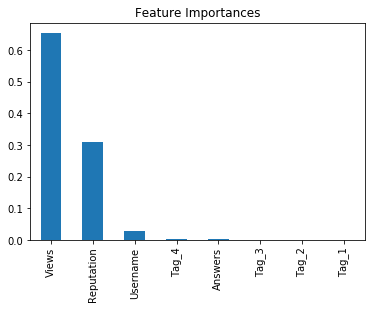

In [51]:
coef = pd.Series(ab.feature_importances_,df_treated.drop('Upvotes', axis = 1).columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importances')

#### Removal of Username ..Doesnt impact ..the results

In [ ]:
# X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(df_treated.drop(columns=["Upvotes","Username"], axis = 1), y, test_size = 0.3, random_state = 42)

In [ ]:
# ab.fit(X_train_f, y_train_f)

# y_pred_ab_f = ab.predict(X_test_f)

# mean_squared_error(y_test_f,y_pred_ab_f),r2_score(y_test_f,y_pred_ab_f)

#### LassoLars

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoLars

poly_reg = PolynomialFeatures(degree = 4,interaction_only=False, include_bias=True)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_train, y_train)
lin_reg_1 = LassoLars(alpha=0.021,max_iter=150)
lin_reg_1.fit(X_poly, y_train)

# predicitng 
pred_val = lin_reg_1.predict(poly_reg.fit_transform(X_test))

print(r2_score(y_test, pred_val))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 29 iterations, i.e. alpha=4.333e-02, with an active set of 23 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 36 iterations, i.e. alpha=3.840e-02, with an active set of 30 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 42 iterations, i.e. alpha=3.088e-02, with an active set of 32 regressors, and the smallest cholesky pivot eleme

0.043302972830728925


In [76]:
df_new = pd.read_csv("train_NIR5Yl1.csv")

In [77]:
df_new

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0
5,345568,r,440.0,1.0,23866,5577.0,4.0
6,376865,c,147.0,1.0,10759,17184.0,17.0
7,467378,j,2269.0,2.0,54623,312.0,3.0
8,393640,j,111.0,2.0,172926,53738.0,79.0
9,130054,c,2749.0,1.0,10189,227.0,0.0


In [78]:
df_new = df_new.drop(columns=["ID","Username"])

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df_new['Tag'] = labelencoder_X.fit_transform(df_new['Tag'])
# target = train['Upvotes']


X_train_new , x_val, y_train_new, y_val = train_test_split(df_new.drop(columns=["Upvotes"]), df_new["Upvotes"],test_size = 0.22,random_state =205)
sc_X = StandardScaler()
X_train_new = sc_X.fit_transform(X_train_new)
x_val = sc_X.transform(x_val)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [80]:
poly_reg = PolynomialFeatures(degree = 4,interaction_only=False, include_bias=True)
X_poly = poly_reg.fit_transform(X_train_new)
poly_reg.fit(X_train_new, y_train_new)
lin_reg_1 = LassoLars(alpha=0.021,max_iter=150)
lin_reg_1.fit(X_poly, y_train_new)

# predicitng 
pred_val = lin_reg_1.predict(poly_reg.fit_transform(x_val))

print(r2_score(y_val, pred_val))

0.9092640277157145


In [83]:
ab_new = AdaBoostRegressor(base_estimator=dt,n_estimators=50,random_state = 42)

ab_new.fit(X_train_new, y_train_new)

#### Final RMSE on AdaBoost and R2

y_pred_ab_new = ab_new.predict(x_val)

mean_squared_error(y_val,y_pred_ab_new),r2_score(y_val,y_pred_ab_new)

(1671659.2229571226, 0.8357885360006134)

In [84]:
test = pd.read_csv('test_8i3B3FC.csv')
ids = test['ID']
test.drop(['ID','Username'], axis=1,inplace =True)


labelencoder_X = LabelEncoder()
test['Tag'] = labelencoder_X.fit_transform(test['Tag'])

In [85]:
test = sc_X.fit_transform(test)

pred_test = lin_reg_1.predict(poly_reg.fit_transform(test))
pred_test=abs(pred_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [86]:
submission = pd.DataFrame({'ID': ids,
                           'Upvotes':pred_test
                           })

submission.to_csv("final_submission.csv",index=False)

In [ ]:
df_treated

In [52]:
import pickle

In [53]:
filename= "final_model_ab_unscaled.pkl"
pickle.dump(ab, open(filename, 'wb'))

### Below is the commented code for Test on "test.csv"
#### The test is done and a csv is obtained -- the code for same is in upvotes-test.ipynb

In [ ]:
# loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# test = pd.read_csv("test_8i3B3FC.csv")

# test.head()

In [ ]:
#result = loaded_model.predict(test)

In [ ]:
# df_submission = pd.DataFrame()

# df_submission["ID"]=df["ID"]

# df_submission["Upvotes"] = result

# df_submission.to_csv("submission.csv",index=False)